<a href="https://colab.research.google.com/github/FabianaAlbuquerque97/Analise-de-dados-de-tomografias-para-segmentar-o-coracao/blob/main/Analise_de_dados_imagens_do_cora%C3%A7%C3%A3o_PIBIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análises de Imagens do Coração para Segmentação**

####Instalando a biblioteca Pillow

In [ ]:
!pip install pillow

####Instalando a biblioteca MedPy

In [ ]:
!pip3 install medpy

     |████████████████████████████████| 151 kB 5.2 MB/s 
     |████████████████████████████████| 48.4 MB 5.1 kB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754468 sha256=6561dfb59042f4ccb96e29ee5859506fc47ac95e8a42ff08b7493ac68a7e0d4e
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy


####Instalando a biblioteca SimpleITK

In [ ]:
!pip install SimpleITK

####Importação das bibliotecas

In [ ]:
%matplotlib inline

import pandas as pd
import tensorflow.compat.v1 as tf
from tensorflow import keras
import numpy as np
import PIL
from PIL import Image
from medpy.io import load
import SimpleITK as sitk
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
#Upload dos arquivos de imagens
from google.colab import files
arq = files.upload()

####Visualizando as imagens .NII com a biblioteca MedPy

In [ ]:
#Primeira imagem la_003.nii
i, h = load("la_003.nii")
#Mostrar as dimensões X, Y e Z e mostrar o tipo.
print (i.shape, i.dtype)

(320, 320, 130) float32


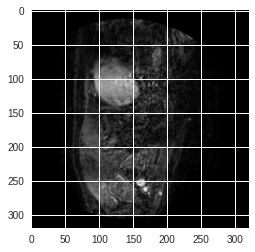

In [ ]:
plt.imshow(ct_scans[i])

In [ ]:
#Segunda imagem la_004.nii
j, c = load("la_004.nii")
#Mostrar as dimensões X, Y e Z e mostrar o tipo.
print (j.shape, j.dtype)

(320, 320, 110) float32


####Visualizando as imagens .NII com a biblioteca SimpleITK

In [ ]:
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage("la_003.nii", sitk.sitkFloat32))

In [ ]:
plt.figure(figsize=(20,16))

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

In [ ]:
plt.gray()

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.subplots_adjust(0,0,1,1,0.01,0.01)

<Figure size 432x288 with 0 Axes>

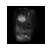

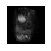

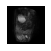

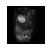

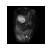

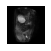

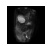

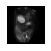

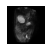

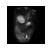

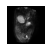

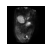

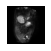

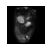

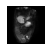

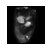

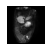

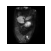

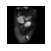

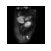

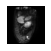

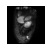

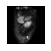

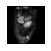

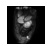

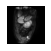

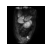

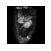

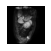

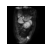

ValueError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
#Mostrando a imagem da ressonância magnética 3D em diferentes ângulos.
for i in range(ct_scans.shape[0]):
    plt.subplot(5,6,i+1), plt.imshow(ct_scans[i]), plt.axis('off')
    plt.show()

####Criando o DataFrame

####Treinando os dados das imagens